# Convolutional Neural Networks (CNNs)
Convolutional neural networks are the workhorses of image recognition.

The filters (a.k.a, image kernels) and the weights in fully connected layers are learned using stochastic gradient descent (minimizing the cost function -- the measure of difference between expected and actual), but in this explanation, we will assume we are using a pretrained network where these values are already learned.

## Features
First principle: an image can be made up of a number of features. For example, an X could be thought of as being made up of upper_left-to-lower_right diagonals, upper_right-to-lower_left diagonals, and a cross in the middle.

<img src="images/cnn1.jpg" height=400, width=500>

These filters to detect certain features can be called __filters__ or __kernels__.

Now, every pixel in our image has some value -- for example, a grayscale value (or, in the case of a coloured image, 3 values -- R, G, and B.)

<img src="images/cnn2.jpg" height=300, width=300>

## The layers in a CNN
In a CNN, we essentially have 4 types of layer:

1. Convolution layer (detect features)
2. ReLU layer (turn -ves into 0s to stop math blowing up)
3. Max pooling layer (shrink the image resolution to save memory/increase speed)
4. Fully connected layer (multiply pixel values by weights to guess what the object is)

Exactly how you organize these layers and how many of them you have -- i.e., organizing the hyperparameters -- is kind of an art.

### 1. Convolution layer
In the convolution layer, we take our filters and move them across every pixel in the image.
At each position, we:

1. Multiply each kernel value by each corresponding pixel value
2. Add up all of these multiplied values
3. Divide by the number of pixels (at least some CNNs seem to do this, others don't)

This will leave us with a stack of filtered images, where we have a value for each pixel. We should be able to see the patterns in these matched images. In the filtered images, high activations will map to where the feature appeared. So already we've started to detect parts of the images, such as edges.

In [5]:
# For example to detect horizontal lines, we might use a filter (kernel) like this:
import numpy as np

horizontal_line_kernel = np.array([[1, 1, 1],
                                   [0, 0, 0,],
                                   [-1, -1, -1]])

horizontal_line_kernel

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

If you think about it, applying this kernel will give high activations where we have a horizontal line with blank space underneath. If we have a vertical line, the 1s on the top row will be cancelled out by the -1s on the bottom row, so vertical lines will be ignored.

We can see an example of this filter being used in conv_example.ods.

<img src="images/cnn3.jpg" height=500, width=500>


In [6]:
# Likewise we could detect vertical lines by using a kernal like this:

vertical_line_kernel = np.array([[1, 0, -1],
                                 [1, 0, -1],
                                 [1, 0, -1]])

vertical_line_kernel

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

So now we could detect vertical lines too:

<img src="images/cnn4.jpg" height=500, width=500>

So in our first layer, a convolution layer, we have picked out the horizontal and vertical lines from our images.

### 2. ReLU Layer
ReLU stands for __Rectified Linear Unit__. All this means is that we take each pixel and turns any -ves into 0. 

`Max(0, activation function(pixels))`

This is just to stop the maths blowing up?

<img src="images/cnn5.jpg" height=500, width=500>


### 3. Max Pooling Layer
The aim of the max pooling layer is to shrink the size of our images while keeping the same general pattern in order to save memory and reduce processing time.

The algorithm is like this:

1. Choose a window size (typically 2x2)
2. Choose a step size (typically 2 -- so we don't overlap)
3. Move the window by the step size, and at each step, take the maximum value in the window

<img src="images/cnn6.jpg" height=500, width=500>

So, so far our steps taken together have taken an image, detected features, got rid of -ves, and then mapped the features onto smaller images.

<img src="images/cnn7.jpg" height=500, width=500>

Not that these layers may be stacked. For example, you might do several convolutions in order to detect, e.g., a horizontal edge at the top and a vertical edge at the right to make a 7.

### 4. Fully Connected Layer
Now, each of our output classes if connected to each of our filters, and each of these connections has a weight attached to it. The weights have calculated by gradient descent such that certain pixel images will give high output activations for this class. For example, if we were detecting a seven, we can imagine the pixel positions for a horizontal bar near the top of the image, and a vertical bar at the right of the image would be connected to high weights, whereas a vertical bar at the bottom of the image would be connected to low weights.

By multiplying each of the values in all of our feature image by the weights, we can get a prediction for each output class.

<img src="images/cnn8.jpg" height=500, width=500>


In code, this means we have a series of weight matrices: 1 for each kernel, for each output class. If we had two image kernels -- two features we were searching for, say vertical and horizontal lines -- and 10 output classes -- say, 10 digits -- we would have 20 weight matrices.

Each set of 2 weight matrices would give you a prediction for a certain class.

In `conv-example.ods` we can see how two features generate a prediction for a certain class: we multiply each feature pixel by the corresponding weight matrix pixel, and sum them all up. Then we add together the scores for both of thes sums.

<img src="images/cnn9.jpg" height=500, width=500>


### 5. Normalizing Prediction Scores (softmax)

#### 5.1 A note on the natural logarithm/e

Recall a few rules:

$ln(x) == log_ex$

$e^y=x == ln(x)=y$ (natural logarithm and e^ are inverse, i.e., ln tells you what what the power was in an $e^y=x$ equation)

$ln(x\cdot{y}) == ln(x) + ln(y)$

$ln(\frac{x}{y}) == ln(x) - ln(y)$


### Back to it...
We want each prediction to be between 0-1, and we want the sum of all predictions to add up to 1. I.e., we want to have a %-like score for each class.

To do this, we use the __softmax__ function. It works like this:

1. Take the score for each class
2. Take $e^{score-for-each-class}$ This has the effect of getting rid of negatives, and also excentuating the differences between numbers
3. Take the sum of (2)
4. For each class, take $e^{score-for-each-class}$/(3) (in other words, it's like a %)

Because in (2) we used $e^x$ to accentuate the difference between scores, we will tend to get one class with a particularly strong prediction, which is what we want.

See `entropy_example.ods` for examples.

<img src="images/cnn10.jpg" height=500, width=500>

Softmax is only implemented for the final layer.

In [13]:
def softmax(inputs):
    return np.exp(inputs) / float(sum(np.exp(inputs)))

Graph X readings: range(-5, 50)
Graph Y readings: [  2.23304715e-24   6.07005148e-24   1.65001106e-23   4.48519509e-23
   1.21920243e-22   3.31413582e-22   9.00875516e-22   2.44883355e-21
   6.65661973e-21   1.80945684e-20   4.91861366e-20   1.33701781e-19
   3.63439123e-19   9.87929963e-19   2.68547207e-18   7.29986992e-18
   1.98431037e-17   5.39391483e-17   1.46621807e-16   3.98559393e-16
   1.08339676e-15   2.94497771e-15   8.00527940e-15   2.17606055e-14
   5.91514586e-14   1.60790335e-13   4.37073446e-13   1.18808881e-12
   3.22956021e-12   8.77885484e-12   2.38634016e-11   6.48674509e-11
   1.76328013e-10   4.79309234e-10   1.30289758e-09   3.54164282e-09
   9.62718331e-09   2.61693974e-08   7.11357975e-08   1.93367146e-07
   5.25626399e-07   1.42880069e-06   3.88388295e-06   1.05574884e-05
   2.86982290e-05   7.80098743e-05   2.12052824e-04   5.76419338e-04
   1.56687021e-03   4.25919482e-03   1.15776919e-02   3.14714295e-02
   8.55482149e-02   2.32544158e-01   6.32120559e-01]


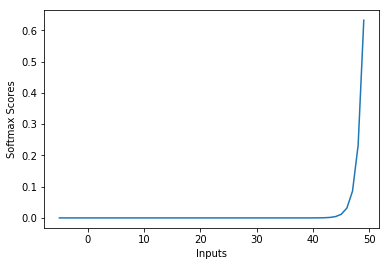

In [15]:
import matplotlib.pyplot as plt
 
def line_graph(x, y, x_title, y_title):
    plt.plot(x, y)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.show()
 
 
graph_x = range(-5, 50)
graph_y = softmax(graph_x)
 
print("Graph X readings: {}".format(graph_x))
print("Graph Y readings: {}".format(graph_y))
 
line_graph(graph_x, graph_y, "Inputs", "Softmax Scores")

## Note on tensors
In terms of practical implementation, our weight matrices, kernels (filters), filtered images, .etc, would be stored in __tensors__.

For machine learning purposes, we can think of tensors as arrays, with higher rank tensors belonging to higher dimensional arrays.

Typically, `tensor_dimensions = (number_of_features)+1`, where the + 1 is a dimension to represent the number of samples you have.

For example, imagine you had an image. The features might be like this:

* Number of pixels for width
* Number of pixels for height
* R, G, and B colors for each pixel

So we might represent it using an array (tensor) for this dimension:

`[H, W, RGB]`

So, if our image was 48x48 pixels:

`[48, 48, 3]`

Then you could index each pixel's R, G, or B value.

Think of it like having 3x(48*48) matrices -- one matrix for each R, G, and B value.

<img src="images/cnn11.jpg" height=500, width=500>

Of course, this only represents a single image, so in order to access the images, you need to add another index for sample number. So if you had 10,000 images, the final tensor dimensions would look like this:

`[10000, 48, 48, 3]`

Likewise we can use tensors to store all of our filtered images, weights, etc.

## References:
* https://www.youtube.com/watch?v=9C06ZPF8Uuc&feature=youtu.be
* https://www.youtube.com/watch?v=FmpDIaiMIeA
* https://www.youtube.com/watch?v=Oqm9vsf_hvU&feature=youtu.be
* https://hackernoon.com/learning-ai-if-you-suck-at-math-p4-tensors-illustrated-with-cats-27f0002c9b32
* https://hackernoon.com/learning-ai-if-you-suck-at-math-p5-deep-learning-and-convolutional-neural-nets-in-plain-english-cda79679bbe3#.xjah79lsd